# Illustration of phenology usecase

This notebook builds up an example illustration of the type of problems we're
trying to tackle. We start by generating some artifical "natural-looking" data.
Then we visualize it in different ways and finally put everything together.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

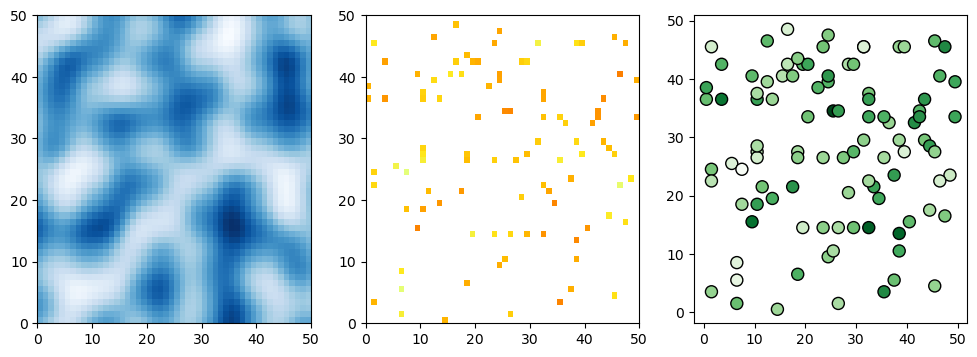

In [2]:
# Function to generate some artifical data

# https://pvigier.github.io/2018/06/13/perlin-noise-numpy.html
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3

    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)


# Make some noise
res = 10
ny = 5 
nx = 5
noise = generate_perlin_noise_2d((ny*res, nx*res), (ny, nx))

n = 100
ypoints = np.random.randint(0, ny*res, n)
xpoints = np.random.randint(0, nx*res, n)

z = np.zeros_like(xpoints, dtype=float)
mask = np.ones_like(noise, dtype=bool)
for i, (x, y) in enumerate(zip(xpoints, ypoints)):
  z[i] = noise[y, x] + np.random.randn()*.2
  mask[y, x] = False

maskednoise = np.ma.masked_array(noise, mask)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].pcolormesh(noise, cmap='Blues')
axs[1].pcolormesh(maskednoise, cmap='Wistia')
axs[2].scatter(xpoints+.5, ypoints+.5, c=z, cmap='Greens', s=75, marker='o', ec='k')


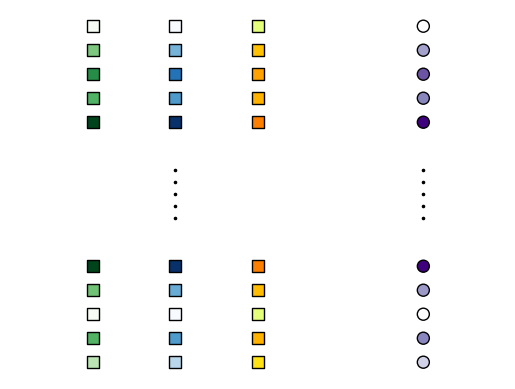

In [3]:
# Illustrate the aligned traintest data

def plot_traintest(ax):
    ax.scatter(.4*np.ones(5), np.arange(5), marker='s', c=z[:5], ec='k', s=75, cmap="Greens")
    ax.scatter(.5*np.ones(5), np.arange(5), marker='s', c=z[:5], ec='k', s=75, cmap="Blues")
    ax.scatter(.6*np.ones(5), np.arange(5), marker='s', c=z[:5], ec='k', s=75, cmap="Wistia")
    ax.scatter(.8*np.ones(5), np.arange(5), marker='o', c=z[:5], ec='k', s=75, cmap="Purples")

    ax.scatter(0.5*np.ones(5), np.linspace(6, 8, 5), marker='.', c='k', s=10)
    ax.scatter(0.8*np.ones(5), np.linspace(6, 8, 5), marker='.', c='k', s=10)

    ax.scatter(.4*np.ones(5), np.arange(10, 15), marker='s', c=z[-5:], ec='k', s=75, cmap="Greens")
    ax.scatter(.5*np.ones(5), np.arange(10, 15), marker='s', c=z[-5:], ec='k', s=75, cmap="Blues")
    ax.scatter(.6*np.ones(5), np.arange(10, 15), marker='s', c=z[-5:], ec='k', s=75, cmap="Wistia")
    ax.scatter(.8*np.ones(5), np.arange(10, 15), marker='o', c=z[-5:], ec='k', s=75, cmap="Purples")

    ax.set_xlim(.3, .9)
    ax.set_axis_off()

fig, ax = plt.subplots()
plot_traintest(ax)

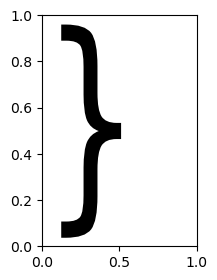

In [4]:
# Plot a vertically scaled curly brace on an axis
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
import matplotlib.transforms as mtransform

def curly_brace(ax):
    # https://stackoverflow.com/a/50041629
    curly = TextPath((0, 0), "}", size=1)
    transform = mtransform.Affine2D().translate(0, .2) + ax.transData
    scaled_curly = PathPatch(curly, lw=0, fc="k", transform=transform)
    ax.add_artist(scaled_curly)

fig, ax = plt.subplots(figsize=(2, 3))
curly_brace(ax)

🟣=f(🟩,🟦,🟨)


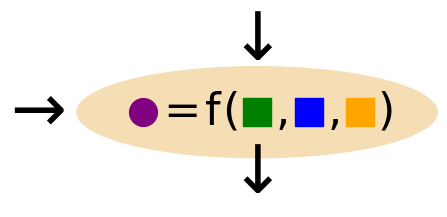

In [5]:
# Can't get unicode to work in matplotlib so do it differently:
print("🟣=f(🟩,🟦,🟨)")
def formula(ax):
    ax.set_xlim(0, .6)
    ax.set_ylim(.475, .525)
    ax.scatter([.08], [.5], marker='o', c='purple', s=400)
    ax.text(.155, .5, '=', fontsize=32, va='center', ha='center')
    ax.text(.215, .5, 'f', fontsize=32, va='center', ha='center')
    ax.text(.25, .5, '(', fontsize=32, va='center', ha='center')
    ax.scatter([.3, .4, .5], [.5, .5, .5], marker='s', c=['green', 'blue', 'orange'], s=400)
    ax.text(.35, .5, ',', fontsize=32, va='center', ha='center')
    ax.text(.45, .5, ',', fontsize=32, va='center', ha='center')
    ax.text(.55, .5, ')', fontsize=32, va='center', ha='center')
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.set_facecolor('wheat')
    ax.set_axis_off()

    ax.text(.3, .525, '↓', ha='center', va='bottom', fontsize=48)
    ax.text(-.07, .5, '→', ha='right', va='center', fontsize=48)
    ax.text(.3, .48, '↓', ha='center', va='top', fontsize=48)
    

    from matplotlib.patches import Ellipse
    box = Ellipse((0.3, 0.5), .7, .06, transform=ax.transData, clip_on=False, zorder=0, fc='wheat')
    ax.add_patch(box)

fig, ax = plt.subplots(figsize=(4, 1))
formula(ax)

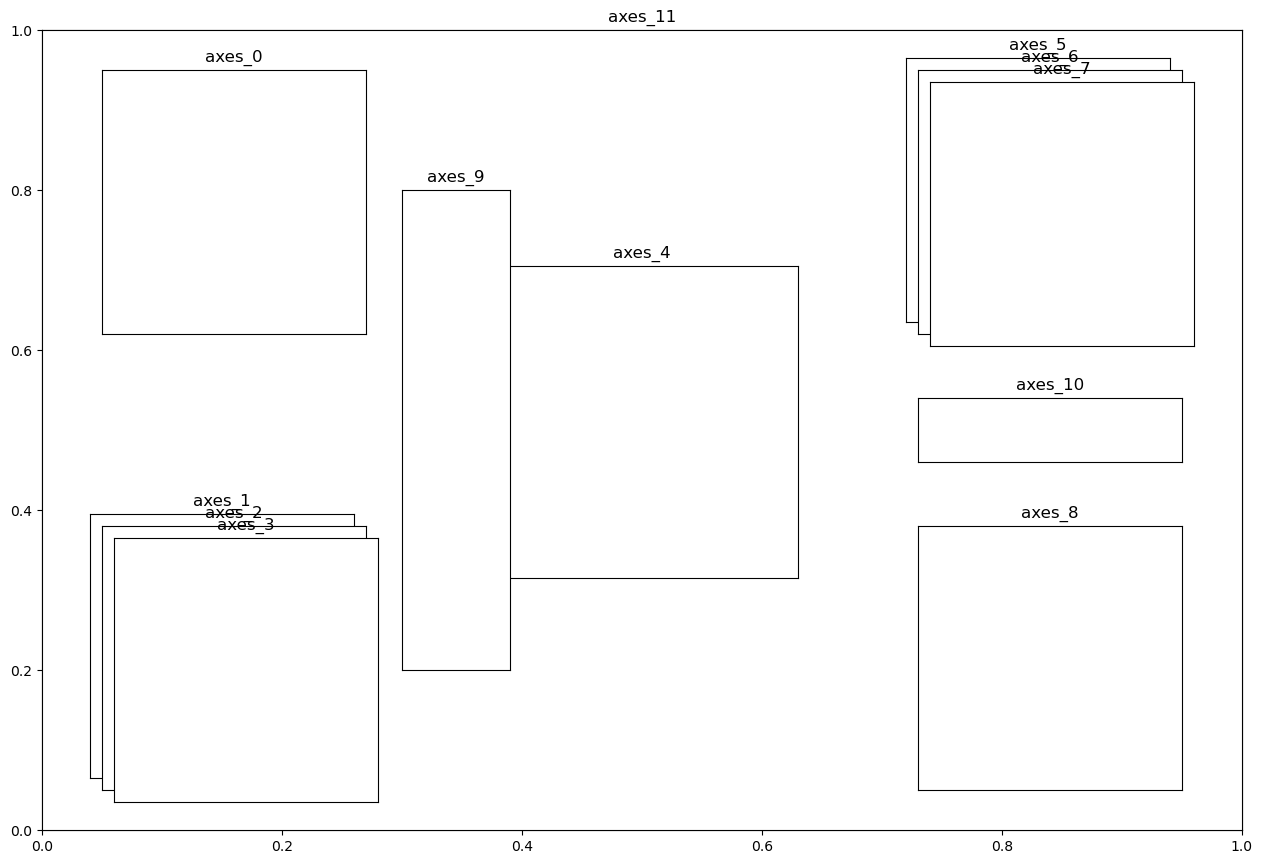

In [6]:
# Design a grid with placeholders

def figure_frame(prototyping=False):
    fig = plt.figure(figsize=(12, 8))

    # If figsize aspect: x/y = 3/2, 
    # then for squares, y distances should be 3/2 x distances
    fig.add_axes([0.05, 0.62, 0.22, 0.33])

    fig.add_axes([0.04, 0.065, 0.22, 0.33])
    fig.add_axes([0.05, 0.05, 0.22, 0.33])
    fig.add_axes([0.06, 0.035, 0.22, 0.33])

    fig.add_axes([0.37, 0.315, 0.26, 0.39])

    fig.add_axes([0.72, 0.635, 0.22, 0.33])
    fig.add_axes([0.73, 0.62, 0.22, 0.33])
    fig.add_axes([0.74, 0.605, 0.22, 0.33])

    fig.add_axes([0.73, 0.05, 0.22, 0.33])

    fig.add_axes([0.3, 0.2, 0.09, 0.6])

    fig.add_axes([0.73, 0.46, 0.22, .08])

    fig.add_axes([0, 0, 1, 1], zorder=-5)

    axes = fig.get_axes()
    for i, ax in enumerate(axes):
        ax.set_xticks([])
        ax.set_yticks([])
        if prototyping:
            ax.set_title(f"axes_{i}")

    # All-encompasing grid
    ax = fig.add_axes([0, 0, 1, 1], zorder=-5)
    if not prototyping:
        ax.set_axis_off()

    return fig, axes

# Show what it looks like
fig, axes = figure_frame(prototyping=True)

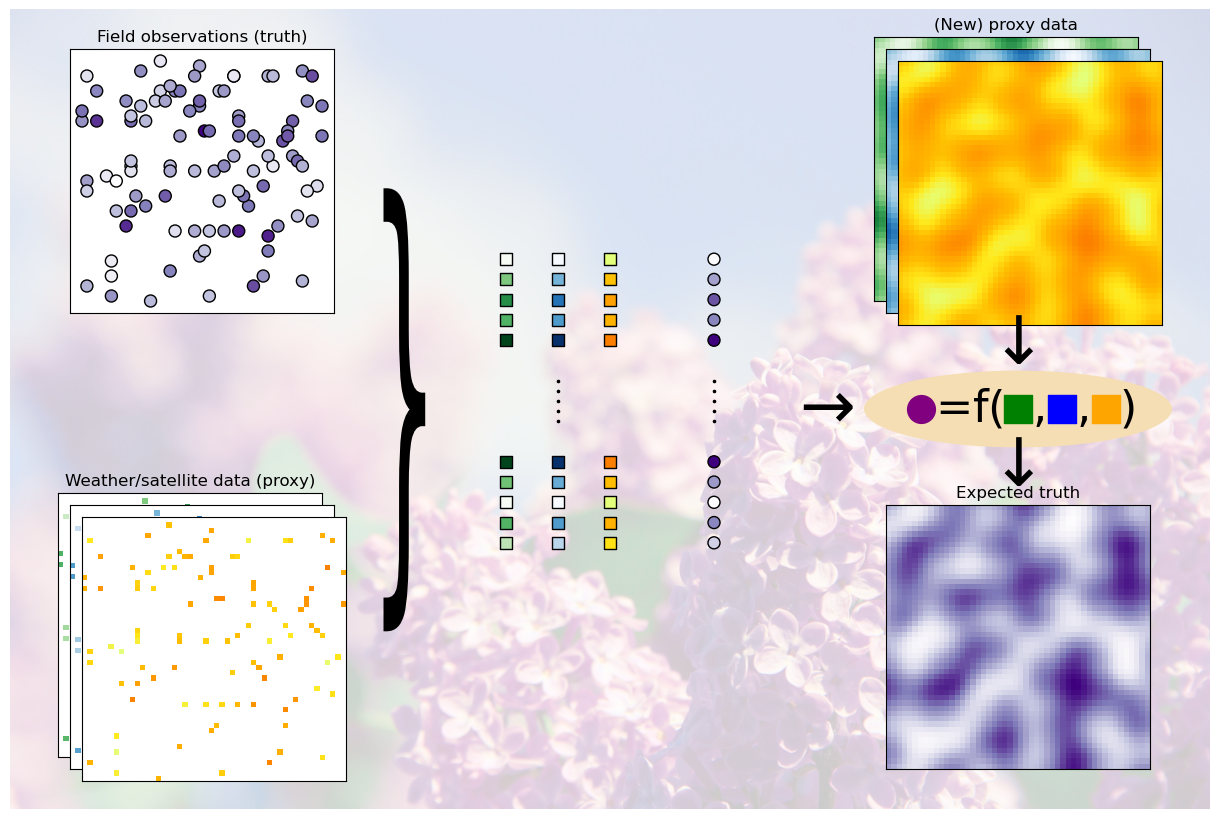

In [7]:
# Now add all the decorations

fig, axes = figure_frame()
# fig.suptitle("Predicting the day of bloom of the common lilac", fontsize=24, y=1.05, va='bottom')

axes[0].set_title("Field observations (truth)")
axes[0].scatter(xpoints+.5, ypoints+.5, c=z, cmap='Purples', s=75, marker='o', ec='k')

axes[1].set_title("Weather/satellite data (proxy)")
axes[1].pcolormesh(maskednoise, cmap='Greens')
axes[2].pcolormesh(maskednoise, cmap='Blues')
axes[3].pcolormesh(maskednoise, cmap='Wistia')

plot_traintest(axes[4])

axes[5].set_title("(New) proxy data")
axes[5].pcolormesh(noise, cmap='Greens')
axes[6].pcolormesh(noise, cmap='Blues')
axes[7].pcolormesh(noise, cmap='Wistia')

axes[8].set_title("Expected truth")
axes[8].pcolormesh(noise, cmap='Purples')

curly_brace(axes[9])
axes[9].set_axis_off()

formula(axes[10])

# CC0 image from https://pixnio.com/flora-plants/flowers/leaf-flower-garden-summer-nature-purple-lilac-plant-blue-sky#
image = plt.imread('../lilac_cc0.jpg')
axes[11].imshow(image, alpha=0.2)
axes[11].set_axis_off()
fig.savefig('../illustration.png')

In [8]:
# Make it easy to save individual layers of the figure

class SelfSavingFigure():

    def __init__(self, filename):
        self.filename=filename
        
        self.fig, self.ax = plt.subplots()
        self.ax.set_xticks([])
        self.ax.set_yticks([])

    def __enter__(self):
        return self.ax

    def __exit__(self, type, value, traceback):
        self.fig.savefig(self.filename, bbox_inches='tight')

In [9]:
# # This generates a lot of figures!
# for cmap in ['Greens', 'Purples', 'Blues', 'Wistia']:
    
#     with SelfSavingFigure(f"perlin_{cmap}.png") as ax:
#         ax.pcolormesh(noise, cmap=cmap)
    
#     with SelfSavingFigure(f"perlin_masked_{cmap}.png") as ax:
#         ax.pcolormesh(maskednoise, cmap=cmap)
    
#     with SelfSavingFigure(f"circles_with_edge{cmap}.png") as ax:
#         ax.scatter(xpoints+.5, ypoints+.5, c=z, cmap=cmap, s=100, marker='o', ec='k')

#     with SelfSavingFigure(f"squares_{cmap}.png") as ax:
#         ax.scatter(xpoints+.5, ypoints+.5, c=z, cmap=cmap, s=100, marker='s')
    
#     with SelfSavingFigure(f"circles_{cmap}.png") as ax:
#         ax.scatter(xpoints+.5, ypoints+.5, c=z, cmap=cmap, s=100, marker='o')

#     with SelfSavingFigure(f"overlayed_{cmap}.png") as ax:
#         ax.pcolormesh(noise, cmap=cmap)
#         ax.scatter(xpoints+.5, ypoints+.5, ec='k', c=z, cmap=cmap, s=100, marker='o')